<a href="https://colab.research.google.com/github/kimdahyeon977/plant_pathology/blob/main/cross_validation_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install pytorch-lightning -q
! pip list | grep torch
! nvidia-smi

     |████████████████████████████████| 585 kB 5.7 MB/s 
     |████████████████████████████████| 596 kB 42.5 MB/s 
     |████████████████████████████████| 419 kB 52.1 MB/s 
     |████████████████████████████████| 140 kB 57.0 MB/s 
     |████████████████████████████████| 1.1 MB 42.8 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 271 kB 47.2 MB/s 
     |████████████████████████████████| 144 kB 53.8 MB/s 
pytorch-lightning             1.6.4
torch                         1.11.0+cu113
torchaudio                    0.11.0+cu113
torchmetrics                  0.9.1
torchsummary                  1.5.1
torchtext                     0.12.0
torchvision                   0.12.0+cu113
Fri Jun 17 10:54:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+-----------------

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#코랩 구글마운트 인증키 넣어서 해결해보기

# Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME ='엘리스_AI프로젝트 '
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/Shareddrives/{}'.format(FOLDERNAME))

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd drive/Shareddrives/$FOLDERNAME

Mounted at /content/drive
[Errno 2] No such file or directory: 'drive/Shareddrives/엘리스_AI프로젝트'
/content


In [ ]:
%cd drive/Shareddrives/'엘리스_AI프로젝트 '

/content/drive/Shareddrives/엘리스_AI프로젝트 


In [ ]:
# path_to_zip_file = 'train_images.zip'
# directory_to_extract_to = 'train_images/'

# import zipfile
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [ ]:
import random
import torch
def seed_everything(seed=7):
    random.seed(seed)
    os.environ['PYTHONHASHSEED']= str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.benchmark = False

In [ ]:
%matplotlib inline

import os
import json
import pandas as pd
from pprint import pprint

base_path = ''
path_csv = os.path.join(base_path, 'train.csv')
train_data = pd.read_csv(path_csv)
#test_data=pd.read_csv(os.path.join(base_path, 'test_csv.csv'))

In [ ]:
import numpy as np

train_data['nb_classes'] = [len(lbs.split(" ")) for lbs in train_data['labels']]
lb_hist = dict(zip(range(10), np.bincount(train_data['nb_classes'])))
print(lb_hist)

{0: 0, 1: 17277, 2: 1155, 3: 200}


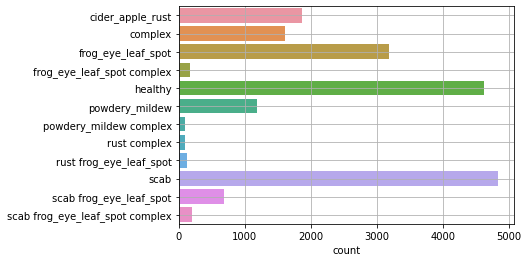

In [ ]:
import itertools
import seaborn as sns

labels_all = list(train_data['labels'])
ax = sns.countplot(y=sorted(labels_all), orient='v')
ax.grid()

In [ ]:
labels_unique=sorted(labels_all)
{lb: i for i, lb in enumerate(labels_unique)}

{'cider_apple_rust': 1859,
 'complex': 3461,
 'frog_eye_leaf_spot': 6642,
 'frog_eye_leaf_spot complex': 6807,
 'healthy': 11431,
 'powdery_mildew': 12615,
 'powdery_mildew complex': 12702,
 'rust complex': 12799,
 'rust frog_eye_leaf_spot': 12919,
 'scab': 17745,
 'scab frog_eye_leaf_spot': 18431,
 'scab frog_eye_leaf_spot complex': 18631}

In [ ]:
data= pd.read_csv(os.path.join(base_path, 'data.csv'))
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,Unnamed: 0,image,labels,nb_classes
0,1661,8d2f7cd0af9208ea.jpg,scab,1
1,14833,e8b1e6549fc41fc0.jpg,scab,1
2,12973,dac007f622fe62c3.jpg,scab,1
3,13315,ddb462c1932e7bc0.jpg,scab,1
4,14910,e8f99633003166fb.jpg,rust,1
5,2162,916bd321c3b374b1.jpg,frog_eye_leaf_spot,2
6,3948,a0a182f1cf1c579f.jpg,frog_eye_leaf_spot,1
7,7084,b2de96165a27a1e2.jpg,healthy,1
8,3135,986b1d8478efa705.jpg,scab,1
9,16439,f40bdac147a23379.jpg,cider_apple_rust,1


In [ ]:
print(data['labels'].value_counts())

scab                  5712
healthy               4624
frog_eye_leaf_spot    4352
rust                  2077
cider_apple_rust      1860
powdery_mildew        1271
Name: labels, dtype: int64


#Annotation

In [ ]:
with open('/content/drive/Shareddrives/엘리스_AI프로젝트 /test_images/0.xml') as annot_file:
    print(''.join(annot_file.readlines()))

{"nbformat":4,"nbformat_minor":0,"metadata":{"colab":{"name":"0.xml","provenance":[],"collapsed_sections":[],"authorship_tag":"ABX9TyON1WcL+lbt6WU1oe5mI7h8"},"kernelspec":{"name":"python3","display_name":"Python 3"},"language_info":{"name":"python"}},"cells":[{"cell_type":"code","execution_count":null,"metadata":{"id":"MBTCDoSiRmj6"},"outputs":[],"source":["<annotation>\n","    <folder> Tomato Septoria leaf spot  </folder>\n","    <filename>0.jpg</filename>\n","    <size>\n","        <width>480</width>\n","        <height>360</height>\n","        <depth>3</depth>\n","    </size>\n","    <segmented>0</segmented>\n","    <object>\n","        <name>Tomato Septoria leaf spot</name>\n","        <pose>Unspecified</pose>\n","        <truncated>0</truncated>\n","        <occluded>0</occluded>\n","        <difficult>0</difficult>\n","        <bndbox>\n","            <xmin>244</xmin>\n","            <ymin>136</ymin>\n","            <xmax>394</xmax>\n","            <ymax>253</ymax>\n","        </

In [ ]:
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET
tree = ET.parse('tree = ET.parse('/kaggle/input/ship-detection/annotations/0.xml')
root = tree.getroot()

sample_annotations = []

for neighbor in root.iter('bndbox'):
    xmin = int(neighbor.find('xmin').text)
    ymin = int(neighbor.find('ymin').text)
    xmax = int(neighbor.find('xmax').text)
    ymax = int(neighbor.find('ymax').text)
    
#     print(xmin, ymin, xmax, ymax)
    sample_annotations.append([xmin, ymin, xmax, ymax])
    
print(sample_annotations)')
root = tree.getroot()

sample_annotations = []

for neighbor in root.iter('bndbox'):
    xmin = int(neighbor.find('xmin').text)
    ymin = int(neighbor.find('ymin').text)
    xmax = int(neighbor.find('xmax').text)
    ymax = int(neighbor.find('ymax').text)
    
#     print(xmin, ymin, xmax, ymax)
    sample_annotations.append([xmin, ymin, xmax, ymax])
    
print(sample_annotations)

SyntaxError: ignored

**< imbalance data를 해결하는 방법 >**

1. oversampling 
장점 : under-sampling보다 성능이 뛰어나다. 
단점 : minor class를 판별시 과적합 될 가능성이 있다.

2. undersampling
장점 :  모델이 빨리 돌아간다.
단점 : 과적합

3. SMOTE : 주변에 있는 데이터셋의 특징과 유사하게 데이터를 생성한다.
장점 : 데이터 손실을 하지 않으면서 과적합을 피할 수 있다.
단점 : 고차원 데이터에 효율적이지 않다.

우리는 고차원 데이터를 다루고 있기때문에 oversampling을 쓸 것이다.

**< Pytorch 에서는 어떻게 ? >** 

파이토치에서 sampler 옵션을 사용하면 데이터 크래스와 상호 작용하고 이 클래스에서 샘플링 하는 방법을 알려준다.
다른 클래스의 가중치를 사용하여 sampler 클래스 객체를 생성하는 방식이다.

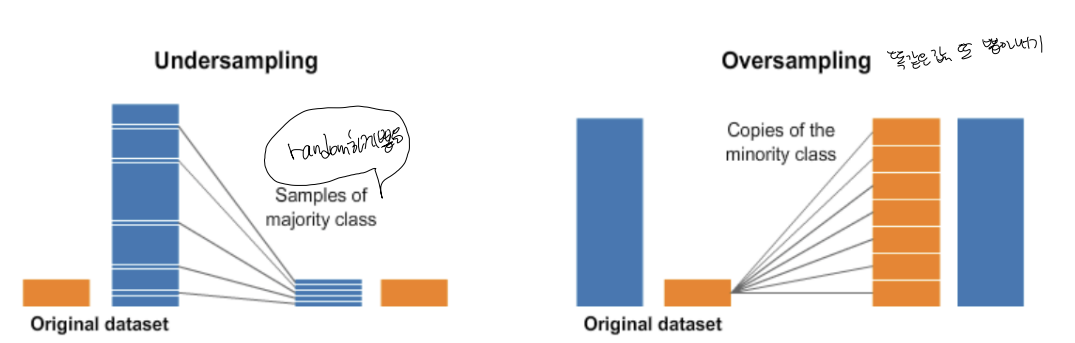

**< 주의할 점! >**

반드시 cross-validation을 한 후에 데이터를 증강시킨다.
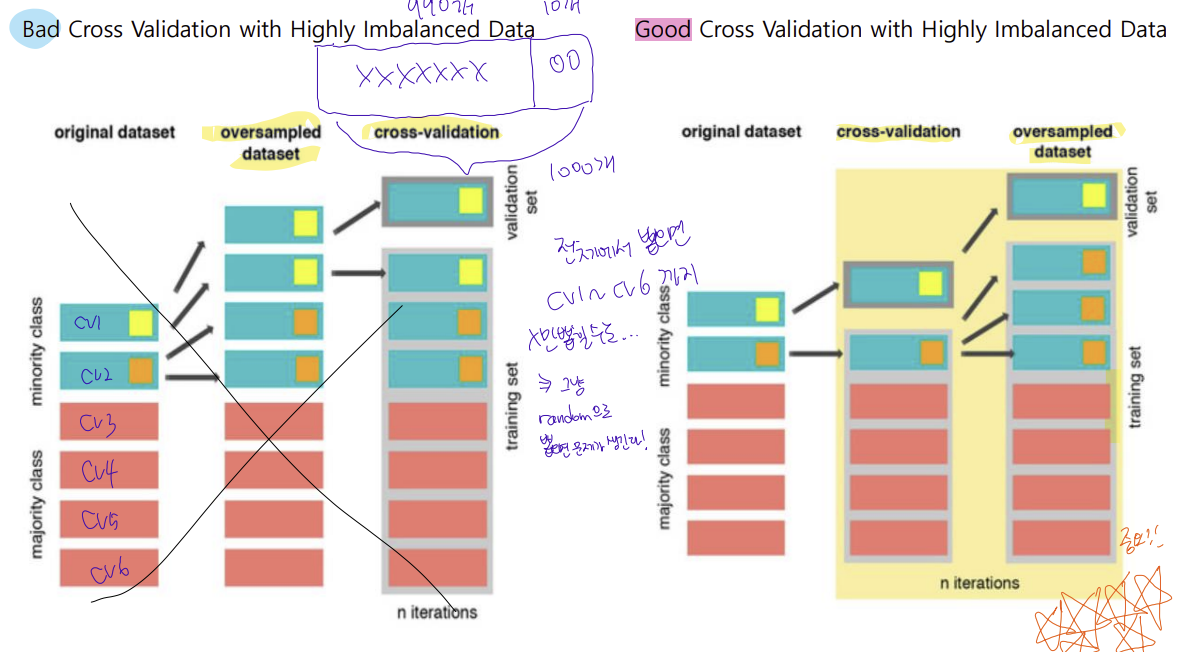

In [ ]:
# labels_unique = set(labels_all)
# print(f"unique labels: {labels_unique}")
# train_data['labels_sorted'] = [" ".join(sorted(lbs.split(" "))) for lbs in train_data['labels']]

# labels_combine = {}
# for comb in train_data['labels_sorted']:
#     labels_combine[comb] = labels_combine.get(comb, 0) + 1

# show_counts = '\n'.join(sorted(f'\t{k}: {v}' for k, v in labels_combine.items()))
# print(f"unique combinations: \n" + show_counts)
# print(f"total: {sum(labels_combine.values())}")

(-0.5, 959.5, 640.5, -0.5)

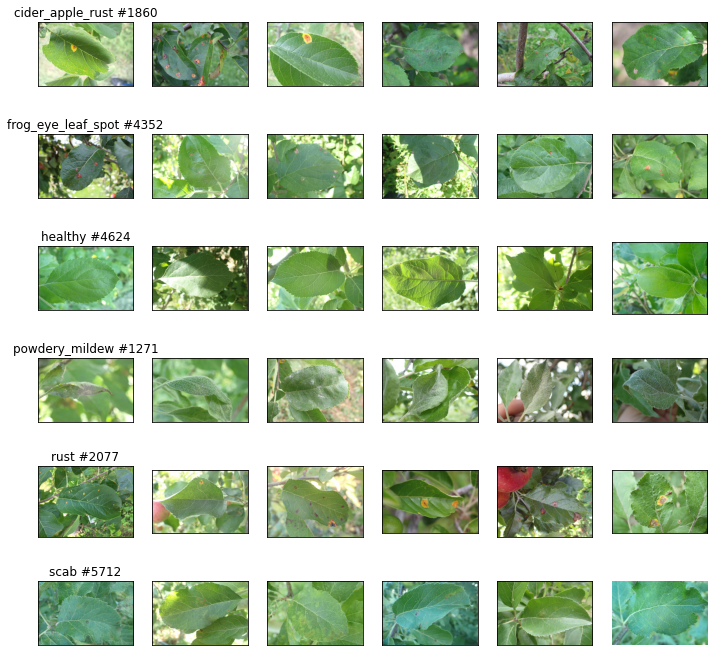

In [ ]:
import matplotlib.pyplot as plt

nb_samples = 6
n, m = len(np.unique(data['labels'])), nb_samples,
fig, axarr = plt.subplots(nrows=n, ncols=m, figsize=(m * 2, n * 2))
for ilb, (lb, df_) in enumerate(data.groupby('labels')):
    img_names = list(df_['image'])
    for i in range(m):
        img_name = img_names[i]
        img = plt.imread(os.path.join(base_path, f"train_images/{img_name}"))
        axarr[ilb, i].imshow(img)
        if i == 0:
            axarr[ilb, i].set_title(f"{lb} #{len(df_)}")
        axarr[ilb, i].set_xticks([])
        axarr[ilb, i].set_yticks([])
plt.axis('off')

In [ ]:
def edge_and_cut(img):
    emb_img = img.copy()
    edges = cv2.Canny(img, 100, 200)
    edge_coors = []
    for i in range(edges.shape[0]):
        for j in range(edges.shape[1]):
            if edges[i][j] != 0:
                edge_coors.append((i, j))
    
    row_min = edge_coors[np.argsort([coor[0] for coor in edge_coors])[0]][0]
    row_max = edge_coors[np.argsort([coor[0] for coor in edge_coors])[-1]][0]
    col_min = edge_coors[np.argsort([coor[1] for coor in edge_coors])[0]][1]
    col_max = edge_coors[np.argsort([coor[1] for coor in edge_coors])[-1]][1]
    new_img = img[row_min:row_max, col_min:col_max]
    
    emb_img[row_min-10:row_min+10, col_min:col_max] = [255, 0, 0]
    emb_img[row_max-10:row_max+10, col_min:col_max] = [255, 0, 0]
    emb_img[row_min:row_max, col_min-10:col_min+10] = [255, 0, 0]
    emb_img[row_min:row_max, col_max-10:col_max+10] = [255, 0, 0]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 20))
    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Original Image', fontsize=24)
    ax[1].imshow(new_img, cmap='gray')
    ax[1].set_title('Canny Edges', fontsize=24)
    ax[2].imshow(emb_img, cmap='gray')
    ax[2].set_title('Bounding Box', fontsize=24)
    plt.show()

데이터셋 준비!

0
[ 3839  3841  3842 ... 19893 19894 19895]
[   0    1    2 ... 4230 4233 4243]
1
[    0     1     2 ... 19893 19894 19895]
[3839 3841 3842 ... 8474 8492 8512]
2
[    0     1     2 ... 19893 19894 19895]
[ 7783  7786  7788 ... 12119 12140 12225]
3
[    0     1     2 ... 19893 19894 19895]
[11783 11784 11785 ... 16127 16134 16147]
4
[    0     1     2 ... 16127 16134 16147]
[15693 15707 15712 ... 19893 19894 19895]


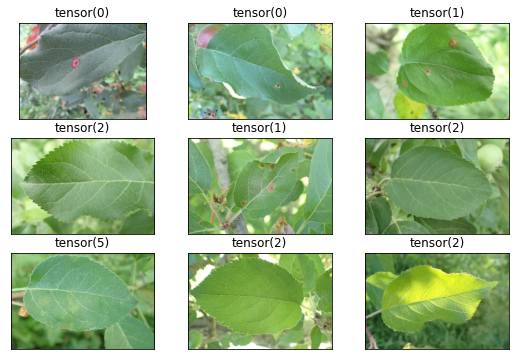

In [ ]:
from sklearn.model_selection import StratifiedKFold
n_iter=0
skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(data['image'], data['labels']):
            print(n_iter)
            n_iter+=1
            print(train_index)
            print(test_index)
import os
import torch
from PIL import Image
from torch.utils.data import Dataset

class PlantPathologyDataset(Dataset):
    def __init__(
        self,
        path_csv: str = os.path.join(base_path, 'data.csv'),
        path_img_dir: str = os.path.join(base_path, 'train_images'),
        transforms = None,
        mode: str = 'train',
        split: float = 0.8,
    ):
        self.path_img_dir = path_img_dir
        self.transforms = transforms
        self.mode = mode

        self.data = pd.read_csv(path_csv)
        labels_all = list( self.data['labels'])
        self.labels_unique = sorted(set(labels_all))
        self.labels_lut = {lb: i for i, lb in enumerate(self.labels_unique)}
        self.num_classes = len(self.labels_unique)

        # split dataset
        self.data = self.data.sample(frac=1).reset_index(drop=True)
        self.data = self.data.iloc[train_index] if mode == 'train' else self.data.iloc[test_index]
        self.img_names = list(self.data['image'])
        self.labels = list(self.data['labels'])

    def to_one_hot(self, labels: str) -> tuple:
        one_hot = [0] * len(self.labels_unique)
        for lb in labels.split(" "):
            one_hot[self.labels_lut[lb]] = 1
        return tuple(one_hot)

    def __getitem__(self, idx: int) -> tuple:
        img_path = os.path.join(self.path_img_dir, self.img_names[idx])
        assert os.path.isfile(img_path)
        label = self.labels[idx]
        img = plt.imread(img_path)

        # augmentation
        if self.transforms:
            img = self.transforms(Image.fromarray(img))
        label = self.to_one_hot(label)
        label=np.argmax(label).reshape(-1,1)
        return img, torch.tensor(label[0][0])

    def __len__(self) -> int:
        return len(self.data)

# ==============================
# ==============================

dataset = PlantPathologyDataset()

# quick view
fig = plt.figure(figsize=(9, 6))
for i in range(9):
    img, lb = dataset[i]
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(img)
    ax.set_title(lb)

In [ ]:
train_data = data.iloc[train_index,]
test_data=data.iloc[test_index,]

In [ ]:
from torchvision import transforms as T
TRAIN_TRANSFORM = T.Compose([
    T.Resize(512),
    T.RandomPerspective(),
    T.RandomResizedCrop(224),
    T.RandomHorizontalFlip(),
    T.RandomVerticalFlip(),
    T.ColorJitter(brightness=0.5, contrast=0.3, hue=0.3),
    T.RandomInvert(),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    # T.Normalize([0.431, 0.498,  0.313], [0.237, 0.239, 0.227]),  # custom
])

VALID_TRANSFORM = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    # T.Normalize([0.431, 0.498,  0.313], [0.237, 0.239, 0.227]),  # custom
])

training dataset: 15917
test dataset: 3979
6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


batch labels: 333
image size: torch.Size([3, 224, 224])
<class 'torch.Tensor'>


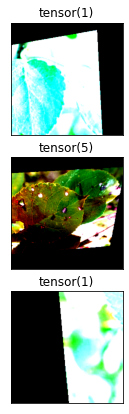

In [ ]:
import multiprocessing as mproc
import pytorch_lightning as pl
from torch.utils.data import DataLoader

class PlantPathologyDM(pl.LightningDataModule):
    dataset_cls = PlantPathologyDataset

    def __init__(
        self,
        path_csv: str = os.path.join(base_path, 'data.csv'),
        path_img_dir: str = os.path.join(base_path, 'train_images'),
        batch_size: int = 128,
        num_workers: int = None,
    ):
        super().__init__()
        self.path_csv = path_csv
        self.path_img_dir = path_img_dir
        self.batch_size = batch_size
        self.num_workers = num_workers if num_workers is not None else mproc.cpu_count()
        self.train_dataset = None
        self.test_dataset = None

    def prepare_data(self):
        pass

    @property
    def num_classes(self) -> int:
        assert self.train_dataset and self.test_dataset
        return max(self.train_dataset.num_classes, self.test_dataset.num_classes)

    def setup(self, stage=None):
        self.train_dataset = self.dataset_cls(self.path_csv, self.path_img_dir, mode='train', transforms=TRAIN_TRANSFORM)
        print(f"training dataset: {len(self.train_dataset)}")
        self.test_dataset = self.dataset_cls(self.path_csv, self.path_img_dir, mode='test', transforms=VALID_TRANSFORM)
        print(f"test dataset: {len(self.test_dataset)}")

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            shuffle=True,
        )


    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            batch_size=self.batch_size,
            num_workers=self.num_workers,
            shuffle=False,
        )

# ==============================
# ==============================

dm = PlantPathologyDM()
dm.setup()
print(dm.num_classes)

# quick view
fig = plt.figure(figsize=(3, 7))
for imgs, lbs in dm.train_dataloader():
    print(f'batch labels: {torch.sum(lbs, axis=0)}')
    print(f'image size: {imgs[0].shape}')
    print(type(imgs))
    for i in range(3):
        ax = fig.add_subplot(3, 1, i + 1, xticks=[], yticks=[])
        # print(np.rollaxis(imgs[i].numpy(), 0, 3).shape)
        ax.imshow(np.rollaxis(imgs[i].numpy(), 0, 3))
        ax.set_title(lbs[i])
    break

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('Device:', device)
print('Current cuda device:', torch.cuda.current_device())
print('Count of using GPUs:', torch.cuda.device_count())

Device: cuda
Current cuda device: 0
Count of using GPUs: 1


#cosine Similarity

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.12459627


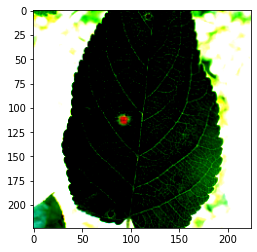

In [ ]:
img1 = plt.imread('train_images/8a9237d6a86ba167.jpg')
img1=VALID_TRANSFORM(Image.fromarray(img1))
img1=img1.numpy()
#plt.imshow(img1.T)
img1=np.ravel(img1, order='K')
img2 = plt.imread('train_images/a50ad20b9ab93d75.jpg')
img2=VALID_TRANSFORM(Image.fromarray(img2))
img2=img2.numpy()
plt.imshow(img2.T)
img2=np.ravel(img2, order='K')
from numpy import dot
from numpy.linalg import norm
def cosine_similarity(A,B):
  return dot(A,B)/(norm(A)*norm(B))


print(cosine_similarity(img1,img2))

##CNN Model

In [ ]:
def create_model(pretrained=True):
    model = torchvision.models.resnet50(pretrained=pretrained).to(device)
    
    for param in model.layer1.parameters():
        param.requires_grad = False
        
    for param in model.layer2.parameters():
        param.requires_grad = False  
        
    for param in model.layer3.parameters():
        param.requires_grad = False 
    
    model.fc = torch.nn.Sequential(
        torch.nn.Linear(
            in_features=model.fc.in_features,
            out_features=6
        ),
        torch.nn.Sigmoid()
    ).to(device)
    
    return model


In [ ]:
num_epochs=10
def train_epoch(model,device,dataloader,loss_fn,optimizer):
    train_loss,train_correct=0.0,0
    model.train()
    for images, labels in dataloader:

        images,labels = images.to(device),labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * images.size(0)
        scores, predictions = torch.max(output.data, 1)
        train_correct += (predictions == labels).sum().item()

    return train_loss,train_correct
  
def valid_epoch(model,device,dataloader,loss_fn):
    valid_loss, val_correct = 0.0, 0
    model.eval()
    for images, labels in dataloader:

        images,labels = images.to(device),labels.to(device)
        output = model(images)
        loss=loss_fn(output,labels)
        valid_loss+=loss.item()*images.size(0)
        scores, predictions = torch.max(output.data,1)
        val_correct+=(predictions == labels).sum().item()

    return valid_loss,val_correct

In [ ]:
wandb login

In [ ]:
import wandb

wandb.init(project="color jitter")

Widget Javascript not detected.  It may not be installed or enabled properly.


In [ ]:
import torchvision
import torch.nn as nn
foldperf={}
from torch.utils.data import SubsetRandomSampler
nSamples = [5712,4624,4352,2077,1860,1271]
normedWeights = [1 - (x / sum(nSamples)) for x in nSamples]
normedWeights = torch.FloatTensor(normedWeights).to(device)
criterion = nn.CrossEntropyLoss(normedWeights)
model = create_model(pretrained=True).to(device)
wandb.init(project='color jitter',entity='dahyeon')
wandb.watch(model,criterion,log="all",log_freq=10)
for fold, (train_idx,val_idx) in enumerate(skf.split(train_data['image'], train_data['labels'])):

    print('Fold {}'.format(fold + 1))

    train_sampler = SubsetRandomSampler(train_idx)
    test_sampler = SubsetRandomSampler(val_idx)
    train_loader = DataLoader(PlantPathologyDataset(mode='train', transforms=TRAIN_TRANSFORM), batch_size=8, sampler=train_sampler)
    test_loader = DataLoader(PlantPathologyDataset(mode='train', transforms=VALID_TRANSFORM), batch_size=8, sampler=test_sampler)
    
    
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

    history = {'train_loss': [], 'test_loss': [],'train_acc':[],'test_acc':[]}
    for epoch in range(num_epochs):
        train_loss, train_correct=train_epoch(model,device,train_loader,criterion,optimizer)
        test_loss, test_correct=valid_epoch(model,device,test_loader,criterion)

        train_loss = train_loss / len(train_loader.sampler)
        train_acc = train_correct / len(train_loader.sampler) * 100
        test_loss = test_loss / len(test_loader.sampler)
        test_acc = test_correct / len(test_loader.sampler) * 100

        print("Epoch:{}/{} AVG Training Loss:{:.3f} AVG Test Loss:{:.3f} AVG Training Acc {:.2f} % AVG Test Acc {:.2f} %".format(epoch + 1,
                                                                                                             num_epochs,
                                                                                                             train_loss,
                                                                                                             test_loss,
                                                                                                             train_acc,
                                                                                                             test_acc))
        wandb.log({'Epoch':epoch, 'train':{"acc":train_acc,"loss":train_loss},'val':{"acc":test_acc,"loss":test_loss}})
        history['train_loss'].append(train_loss)
        history['test_loss'].append(test_loss)
        history['train_acc'].append(train_acc)
        history['test_acc'].append(test_acc)

    foldperf['fold{}'.format(fold+1)] = history  

torch.save(model,'k_cross_CNN.pt')   

Widget Javascript not detected.  It may not be installed or enabled properly.


Fold 1
Epoch:1/10 AVG Training Loss:1.414 AVG Test Loss:1.267 AVG Training Acc 57.19 % AVG Test Acc 70.32 %
Epoch:2/10 AVG Training Loss:1.358 AVG Test Loss:1.215 AVG Training Acc 61.50 % AVG Test Acc 74.97 %
Epoch:3/10 AVG Training Loss:1.345 AVG Test Loss:1.223 AVG Training Acc 62.67 % AVG Test Acc 72.96 %
Epoch:4/10 AVG Training Loss:1.332 AVG Test Loss:1.189 AVG Training Acc 64.19 % AVG Test Acc 77.83 %
Epoch:5/10 AVG Training Loss:1.323 AVG Test Loss:1.194 AVG Training Acc 64.92 % AVG Test Acc 77.54 %
Epoch:6/10 AVG Training Loss:1.322 AVG Test Loss:1.193 AVG Training Acc 64.72 % AVG Test Acc 77.54 %
Epoch:7/10 AVG Training Loss:1.312 AVG Test Loss:1.189 AVG Training Acc 65.95 % AVG Test Acc 77.01 %
Epoch:8/10 AVG Training Loss:1.311 AVG Test Loss:1.195 AVG Training Acc 65.63 % AVG Test Acc 76.85 %
Epoch:9/10 AVG Training Loss:1.302 AVG Test Loss:1.196 AVG Training Acc 66.99 % AVG Test Acc 75.85 %
Epoch:10/10 AVG Training Loss:1.302 AVG Test Loss:1.176 AVG Training Acc 66.51 % AVG

In [ ]:
labels_all=list(data['labels'])
labels_unique = sorted(set(labels_all))
labels_lut = {lb: i for i, lb in enumerate(labels_unique)}
num_classes = len(labels_unique)
categories=[k for k,v in labels_lut.items()]
categories

['cider_apple_rust',
 'frog_eye_leaf_spot',
 'healthy',
 'powdery_mildew',
 'rust',
 'scab']

In [ ]:
model2=torch.load('k_cross_CNN.pt')
model2.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
wandb.config.update(model2)

In [ ]:
def count_frequency(my_list):
    
    count = {}
    
    for item in my_list:
        count[item] = count.get(item, 0) + 1
        
    return count

In [ ]:
preds = []
dm.batch_size = 256
total_batch = int(3979/dm.batch_size)
for i in range(total_batch):
    for imgs, names in dm.test_dataloader():
            with torch.no_grad():
                imgs=imgs.cuda()
                encode = model2(imgs)
                #print(len(encode))
            #print(np.round(encode.cpu().numpy(), decimals=2))
            for be, name in zip(encode,names ):#여기서 be는 encode 원소들 즉, 예측결과
                #count= count_frequency(np.round(be.cpu().numpy(), decimals=2))
                # if 1.0 in count.keys() and count[1.0]==2 :
                #         temp=np.argpartition(be.cpu().detach().numpy(), -2)[-2:]
                #         lbs=int(name.numpy()) if name.numpy() in temp else temp[0]
                lbs=np.argmax(be.cpu().detach().numpy())
                preds.append(dict(labels=int(name.numpy()), predict=lbs))
            break

df_preds = pd.DataFrame(preds)
print(df_preds.head())

   labels  predict
0       5        5
1       2        2
2       2        2
3       3        3
4       4        0


In [ ]:
data = {'y_Actual':    list(df_preds['labels'].values),
        'y_Predicted': list(df_preds['predict'].values),
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

      y_Actual  y_Predicted
0            5            5
1            2            2
2            2            2
3            3            3
4            4            0
...        ...          ...
3835         2            2
3836         1            1
3837         2            2
3838         2            2
3839         1            1

[3840 rows x 2 columns]


In [ ]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    0    1    2    3    4    5
Actual                                 
0          225    0   15    0  120    0
1           15  840    0    0   30   30
2            0    0  900   30    0    0
3            0    0    0  195    0    0
4          105   75   15    0  195    0
5            0  180   30   30    0  810


In [ ]:
cm=confusion_matrix.values
type(cm)

numpy.ndarray

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[315   0   0   0  30   0]
 [  0 750  45   0  15  60]
 [  0   0 855  30  15  15]
 [  0   0   0 300   0   0]
 [  0   0  15   0 375  15]
 [ 15  60  60  45  15 810]]


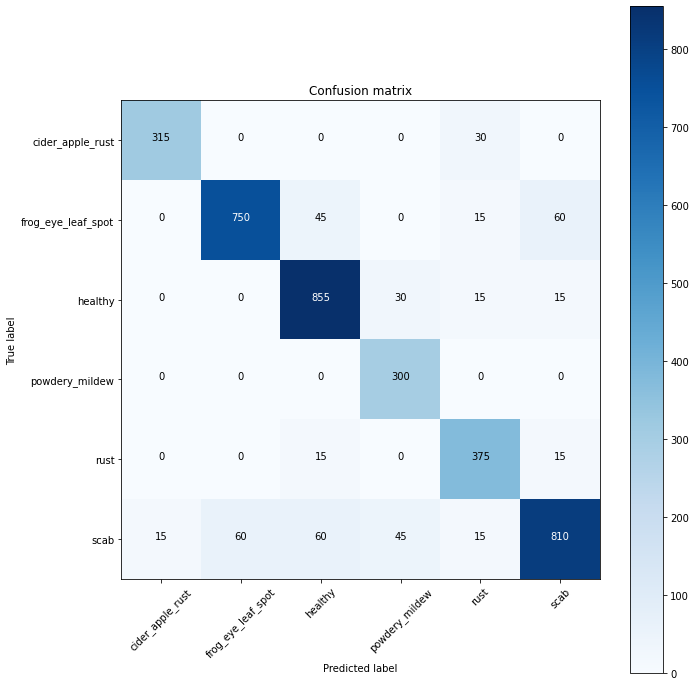

In [ ]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, ['cider_apple_rust', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust', 'scab'])


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(df['y_Predicted'],df['y_Actual']))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       330
           1       0.86      0.93      0.89       810
           2       0.93      0.88      0.90       975
           3       1.00      0.80      0.89       375
           4       0.93      0.83      0.88       450
           5       0.81      0.90      0.85       900

    accuracy                           0.89      3840
   macro avg       0.91      0.88      0.89      3840
weighted avg       0.89      0.89      0.89      3840



In [ ]:
df['y_Predicted'].values

array([0, 2, 5, ..., 1, 3, 5])

In [ ]:
target=list(df['y_Predicted'].values)
labels_unique = sorted(set(target))
labels_lut = {lb: i for i, lb in enumerate(labels_unique)}
result=[]
def to_one_hot( labels:str) -> tuple:
        one_hot = [0] *len(labels_unique)
        one_hot[labels_lut[labels]]=1
        return (one_hot)
for i in target:
    result.append(to_one_hot(i))
pred_array=np.array(result)
pred_array.shape

(3840, 6)

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(pred_array,act_array)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

ValueError: ignored

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

import matplotlib.pyplot as plt
#%matplotlib inline

mnist = fetch_openml("mnist_784")
y = mnist.target
y = y.astype(np.uint8)
n_classes = len(set(y))

Y = label_binarize(mnist.target, classes=[*range(n_classes)])

X_train, X_test, y_train, y_test = train_test_split(mnist.data,
                                                    Y,
                                                    random_state = 42)

clf = OneVsRestClassifier(RandomForestClassifier(n_estimators=50,
                             max_depth=3,
                             random_state=0))
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 0 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 1 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 2 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 3 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/dist-packages/sklearn/multiclass.py:80: UserWarning: Label not 4 is present in all training examples.
  "Label %s is present in all training examples." % str(classes[c])
/usr/local/lib/python3.7/

In [ ]:
print(y_test.shape)
print(y_score.shape)

(17500, 10)
(17500, 10)


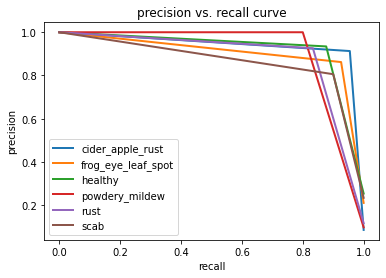

In [ ]:
# precision recall curve
precision = dict()
recall = dict()
for i in range(6):
    precision[i], recall[i], _ = precision_recall_curve(pred_array[:, i],
                                                        act_array[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='{}'.format([k for k,v in labels_lut.items()][i]))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()